# Set an image on another image (Part 2)
    3) Blend together images of different sizes (next code)
    
    we do this work in 3 stages
    
    
    this work is a little complex 
    
    to do this work review this code again

In [1]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def p_print(img,a,b):
    ax,fig = plt.subplots(figsize=(a,b))
    plt.imshow(img)

In [4]:
# Loading : 
img1 = cv2.imread('dog_backpack.jpg')
img2 = cv2.imread('watermark_no_copy.png')
# Color channels order :
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [5]:
# Resizeimg img2
img2  = cv2.resize(img2,(600,600))

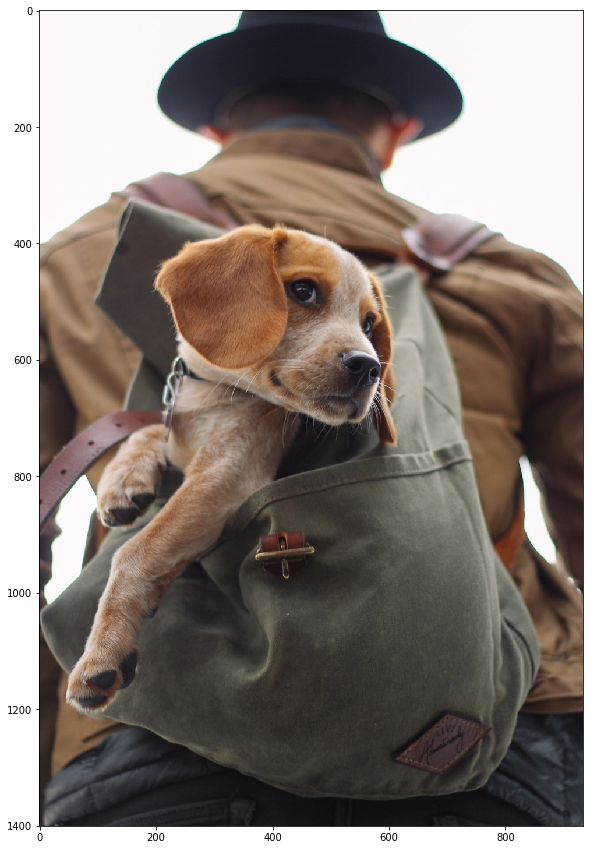

In [6]:
p_print(img1,10,15)

In [7]:
img1.shape

(1401, 934, 3)

In [8]:
# where the img2 begins : 
X_offset = 934 - 600
Y_offset = 1401 - 600

In [9]:
img2.shape

(600, 600, 3)

In [10]:
rows,cols,channels = img2.shape

In [11]:
roi = img1[Y_offset:1401 , X_offset:943]

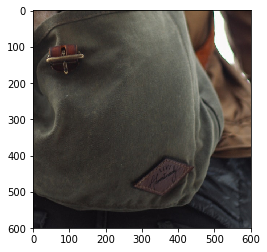

In [12]:
plt.imshow(roi)

In [13]:
img2_gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

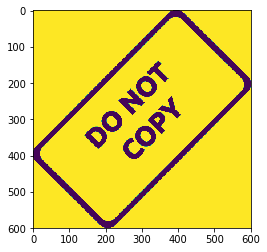

In [14]:
plt.imshow(img2_gray)

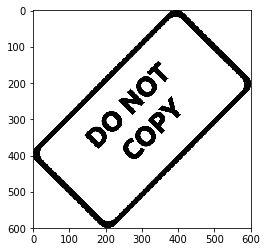

In [15]:
plt.imshow(img2_gray,cmap='gray')

In [16]:
mask_inverse = cv2.bitwise_not(img2_gray)

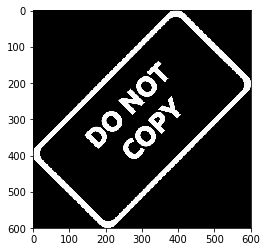

In [17]:
plt.imshow(mask_inverse,cmap='gray')

In [18]:
mask_inverse.shape

(600, 600)

In [19]:
import numpy as np

In [20]:
white_BG = np.full(img2.shape,255,dtype=np.uint8)

In [21]:
white_BG.shape

(600, 600, 3)

In [24]:
BG = cv2.bitwise_or(white_BG,white_BG,mask=mask_inverse)

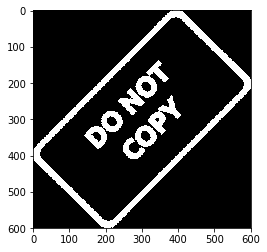

In [25]:
plt.imshow(BG)

In [26]:
FG = cv2.bitwise_or(img2,img2,mask=mask_inverse)

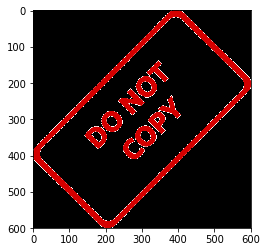

In [27]:
plt.imshow(FG)

In [28]:
final_roi = cv2.bitwise_or(roi,FG)

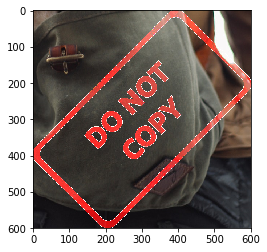

In [29]:
plt.imshow(final_roi)

In [30]:
large_img = img1
small_img = final_roi

In [31]:
large_img[Y_offset:Y_offset+small_img.shape[0],X_offset:X_offset+small_img.shape[1]] = small_img

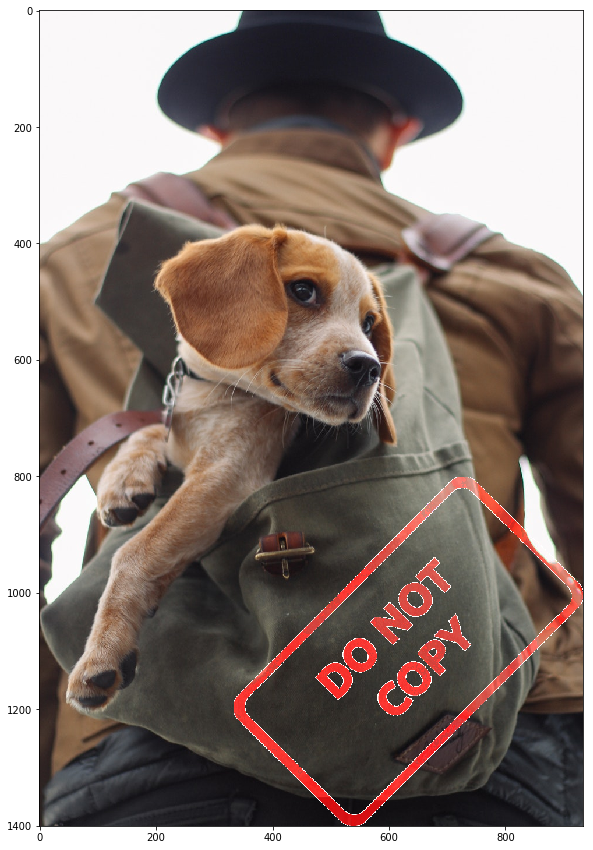

In [32]:
p_print(large_img,10,15)